In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources\hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Get Measurement table columns and values for first row as a dictionary
first_row_measurement = session.query(Measurement).first()
first_row_measurement.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x24b639d7828>,
 'tobs': 65.0,
 'prcp': 0.08,
 'station': 'USC00519397',
 'date': '2010-01-01',
 'id': 1}

In [90]:
# Find the most recent date in the data set.
recent_date_query = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
recent_date_query

('2017-08-23')

In [91]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

recent_date = str(recent_date_query)
recent_year = int(recent_date[2:6])
recent_month = int(recent_date[7:9])
recent_dates = int(recent_date[-5:-3])

In [92]:
# Calculate the date one year from the last date in data set.
previous_year_date = dt.date(recent_year,recent_month,recent_dates) - dt.timedelta(days=365)
print(previous_year_date)

2016-08-23


In [13]:
# Perform a query to retrieve the date and precipitation scores
results = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= previous_year_date).all()
results

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [14]:
# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_data = pd.DataFrame(results, columns=['Date','Precipitation'])
prcp_data.set_index('Date', inplace=True)

# Sort the dataframe by date
prcp_data_df = prcp_data.sort_index(axis=0)
prcp_data_df

Precipitation
Date                     
2016-08-23           0.00
2016-08-23            NaN
2016-08-23           1.79
2016-08-23           0.05
2016-08-23           0.15
...                   ...
2017-08-22           0.00
2017-08-23           0.00
2017-08-23           0.00
2017-08-23           0.08
2017-08-23           0.45

[2230 rows x 1 columns]

In [30]:
prcp_data_df.index.values

array(['2016-08-23', '2016-08-23', '2016-08-23', ..., '2017-08-23',
       '2017-08-23', '2017-08-23'], dtype=object)

In [15]:
unique_dates = prcp_data_df.index.unique()
xyz = unique_dates[::40]
xyz

Index(['2016-08-23', '2016-10-02', '2016-11-11', '2016-12-21', '2017-01-30',
       '2017-03-11', '2017-04-20', '2017-05-30', '2017-07-09', '2017-08-18'],
      dtype='object', name='Date')

In [40]:
x_axis = np.arange(len(prcp_data_df.index.values))

tick_locations = [value for value in x_axis]
x_ticks = tick_locations[::250]
x_ticks

[0, 250, 500, 750, 1000, 1250, 1500, 1750, 2000]

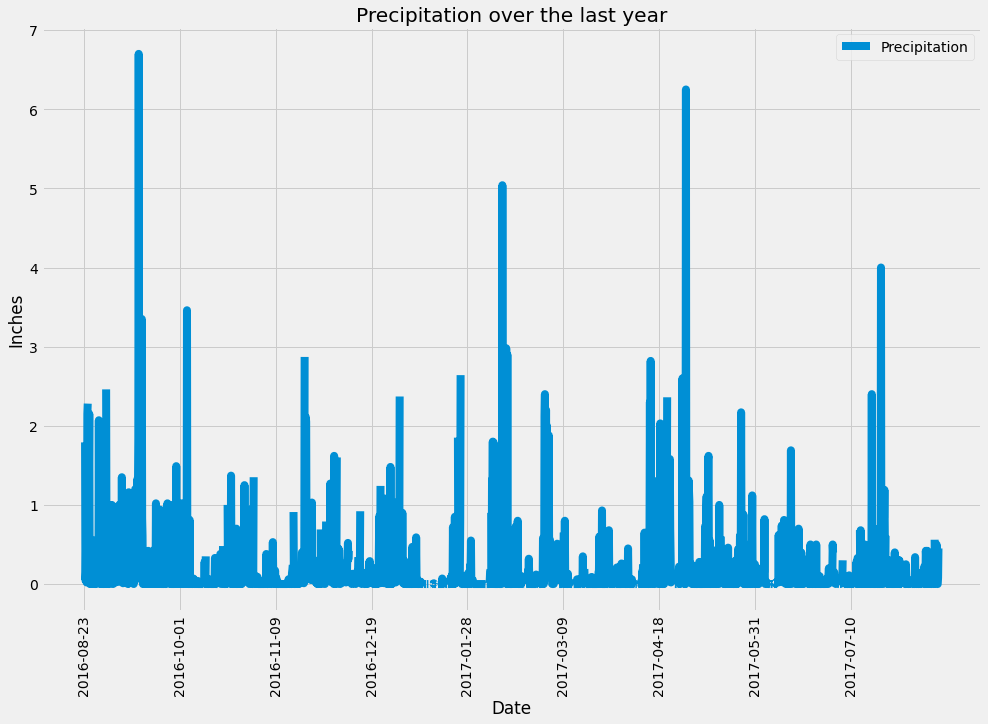

In [43]:
# Use Pandas Plotting with Matplotlib to plot the data
prcp_data_df.plot(title="Precipitation over the last year", figsize=(15,10), rot=90, grid=True, xticks=x_ticks, linewidth=8)
plt.ylabel('Inches')
plt.show()

In [18]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_data1 = prcp_data_df.groupby('Date')
prcp_data1["Precipitation"].describe()

count      mean       std   min     25%    50%     75%   max
Date                                                                    
2016-08-23    6.0  0.451667  0.706468  0.00  0.0275  0.100  0.5625  1.79
2016-08-24    6.0  1.555000  0.840541  0.08  1.2775  1.800  2.1500  2.28
2016-08-25    7.0  0.077143  0.071813  0.00  0.0300  0.080  0.0950  0.21
2016-08-26    6.0  0.016667  0.016330  0.00  0.0025  0.015  0.0275  0.04
2016-08-27    5.0  0.064000  0.081731  0.00  0.0000  0.020  0.1200  0.18
...           ...       ...       ...   ...     ...    ...     ...   ...
2017-08-19    3.0  0.030000  0.051962  0.00  0.0000  0.000  0.0450  0.09
2017-08-20    2.0  0.005000  0.007071  0.00  0.0025  0.005  0.0075  0.01
2017-08-21    3.0  0.193333  0.317700  0.00  0.0100  0.020  0.2900  0.56
2017-08-22    3.0  0.166667  0.288675  0.00  0.0000  0.000  0.2500  0.50
2017-08-23    4.0  0.132500  0.215000  0.00  0.0000  0.040  0.1725  0.45

[366 rows x 8 columns]

# Exploratory Station Analysis

In [19]:
# Get Station table columns and values for first row as a dictionary
first_row_station = session.query(Measurement).first()
first_row_station.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x24b639d7828>,
 'tobs': 65.0,
 'prcp': 0.08,
 'station': 'USC00519397',
 'date': '2010-01-01',
 'id': 1}

In [44]:
# Design a query to calculate the total number stations in the dataset
station_count = session.query(Station.station).count()
station_count

9

In [21]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()
             
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

str

In [22]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [23]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [24]:
# Close Session
session.close()